# 1. Try to build a classifier for the MNIST dataset that acheives over 97% accuracy on the test set. 

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [6]:
# make a training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=42)

In [144]:
#KNeighborsClassifier
# optimize wights and n_neighbors hyperparameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [142]:
#create a parameter grid to use in grid search
param_grid= [
    {'weights':['uniform','distance'], 'n_neighbors':[3,4,6]}
]

In [145]:
#initialize KNC
KN_class = KNeighborsClassifier()

#initialize the grid searchc
grid_search = GridSearchCV(KN_class, param_grid, cv=4, verbose=4)

#conduct grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=27.5min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 27.5min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=26.7min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 54.3min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=27.0min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 81.3min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.968, total=26.8min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.971, total=26.9min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.971, total=27.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=27.1min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.969, total=27.2min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.968, total=27.2min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.969, total=27.5min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 650.0min finished


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 6],
                          'weights': ['uniform', 'distance']}],
             verbose=4)

In [147]:
grid_search.best_params_


{'n_neighbors': 4, 'weights': 'distance'}

In [148]:
grid_search.best_score_

0.9715

In [150]:
grid_search.cv_results_

{'mean_fit_time': array([57.74091387, 57.61109263, 58.37631387, 57.84005731, 57.29948634,
        57.1714257 ]),
 'std_fit_time': array([1.26973669, 0.11967821, 1.04817055, 0.38135307, 0.53302921,
        0.4505364 ]),
 'mean_score_time': array([1563.45021129, 1567.75146478, 1583.36521649, 1575.31003517,
        1556.83832496, 1556.74684167]),
 'std_score_time': array([17.86075709,  7.04981651,  7.10668071,  1.34396038, 11.09867154,
        10.5681492 ]),
 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 6, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 4, 'we

In [151]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

# 2. Write a funciton to shift an MNIST image in any direction by one pixel. 
Create four shifted copies of each image in the dataset.
Train my best model on this expanded dateset. 
Evaluate the model using the test set. 
This is called data augmentation or training set expansion.

In [14]:
def show_digit(sample_digit):
    plt.imshow(sample_digit.reshape(28,28), cmap='gray')

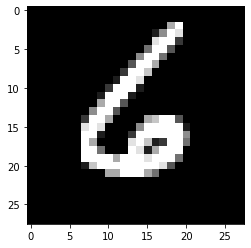

In [18]:
dig_samp = X_train[5,:]
show_digit(dig_samp)

In [88]:
def digit_shifter(curr_digit, shift_dir):
    if shift_dir == 'up':
        curr_digit = np.concatenate((curr_digit[28::], curr_digit[0:28]))
    elif shift_dir == 'down':
        curr_digit = np.concatenate((curr_digit[755::], curr_digit[0:755]))
    else: 
        curr_digit = curr_digit.reshape(28,28)
        if shift_dir == 'left':
            curr_digit = np.column_stack((curr_digit[:,1::], curr_digit[:,0]))
        elif shift_dir == 'right':
            curr_digit = np.column_stack((curr_digit[:,-1], curr_digit[:,0:-1]))
        curr_digit = curr_digit.reshape(28*28)
        
    return curr_digit

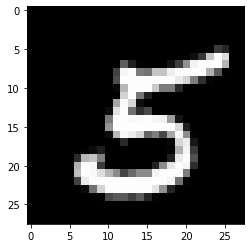

In [89]:
#test out the function
show_digit(digit_shifter(X_train[6,:], 'down'))

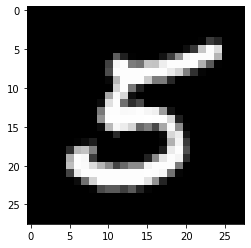

In [65]:
show_digit(X_train[6,:])

In [158]:
#split up the digits into a list
split_data = np.vsplit(X_train, len(X_train))

#use list comprehension to run digit_shifter on each digit for this direction
X_train_shift = [digit_shifter(this_digit, 'left') for this_digit in split_data] \
+ [digit_shifter(this_digit, 'right') for this_digit in split_data] \
+ [digit_shifter(this_digit, 'up') for this_digit in split_data] \
+ [digit_shifter(this_digit, 'down') for this_digit in split_data] 

#convert list of arrays to 2D array
X_train_shift = np.vstack(X_train_shift)

#create a target array for shifted array 
y_train_shift = np.concatenate((y_train, y_train, y_train, y_train))

In [167]:
from sklearn.utils import shuffle

In [168]:
#shuffle the data and train on the best estimator from gridsearchcv

X_train_shift, y_train_shift = shuffle(X_train_shift, y_train_shift, random_state=0)

#initialize KNC
KNC_shuff = KNeighborsClassifier(n_neighbors=4, weights='distance')

#fit the model
KNC_shuff.fit(X_train_shift, y_train_shift)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [169]:
#evaluate model
from sklearn.metrics import classification_report

shuff_preds = KNC_shuff.predict(X_test)

classification_report(y_test, shuff_preds)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1343\n           1       0.97      1.00      0.98      1600\n           2       0.99      0.96      0.97      1380\n           3       0.98      0.97      0.97      1433\n           4       0.98      0.97      0.97      1295\n           5       0.97      0.98      0.97      1273\n           6       0.99      0.99      0.99      1396\n           7       0.97      0.98      0.97      1503\n           8       0.99      0.94      0.97      1357\n           9       0.95      0.96      0.96      1420\n\n    accuracy                           0.98     14000\n   macro avg       0.98      0.97      0.98     14000\nweighted avg       0.98      0.98      0.98     14000\n'

In [172]:
KNC_report = classification_report(y_test, shuff_preds)

In [178]:
print(KNC_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.97      1.00      0.98      1600
           2       0.99      0.96      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.98      0.97      1273
           6       0.99      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.97      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.97      0.98     14000
weighted avg       0.98      0.98      0.98     14000



# Exercise 3 Tackle the Titanic dataset

In [ ]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [ ]:
'C:\Users\Jake\Documents\ClassStuff\Python ML class\Course Repository\titanic_train.csv'
'C:\Users\Jake\Documents\ClassStuff\Python ML class\Course Repository\titanic_test.csv'